#  Hồi quy tuyến tính với Python

(Nhật kí thực hành Python, tuần thứ hai)
By: Lê Ngọc Khả Nhi
Ngày 08/08/2018

In [ ]:
# This is an example snippet!
# To create your own, add a new snippet block to the
# snippets.json file in your jupyter nbextensions directory:
# /nbextensions/snippets/snippets.json
import this

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import patsy as pa

import statsmodels.api as sm

import matplotlib.pyplot as plt

from plotnine import *


Tải dữ liệu CSV bằng pandas

In [2]:
path="https://raw.githubusercontent.com/kinokoberuji/R-Tutorials/master/Membthickness.csv"
df=pd.read_csv(path, sep=';')

df.head()

,BMI,Diagnostic,Thickness
0,19.467401,E,0.142701
1,31.833910,E,0.476060
2,19.944502,E,0.202952
3,23.437500,E,0.396893
4,24.337480,E,0.260699


C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


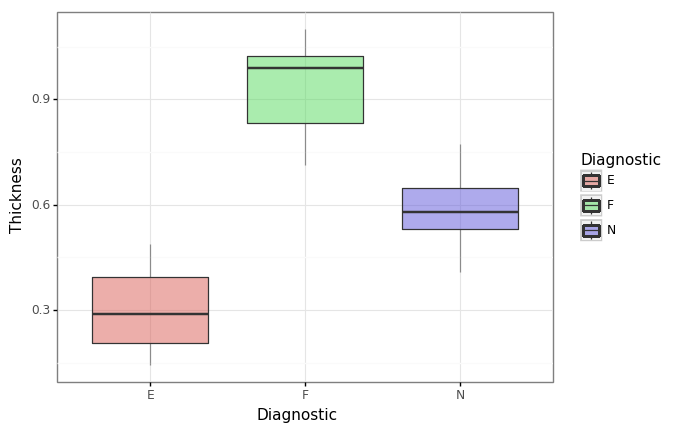

<ggplot: (143581000894)>

In [14]:
(ggplot(df, aes('Diagnostic', 'Thickness',fill='Diagnostic'))
 + geom_boxplot(alpha=0.5)
 + theme_bw())

In [11]:
grouped_df = df.groupby(['Diagnostic'])
grouped_df['Thickness'].describe()

,count,mean,std,min,25%,50%,75%,max
Diagnostic,,,,,,,,
E,14.0,0.307497,0.115139,0.142701,0.206489,0.289362,0.393588,0.486870
F,9.0,0.922959,0.143293,0.712176,0.831632,0.990151,1.024771,1.100068
N,15.0,0.590980,0.095471,0.409640,0.529445,0.580132,0.649025,0.772808


Thống kê mô tả với pandas và seaborn

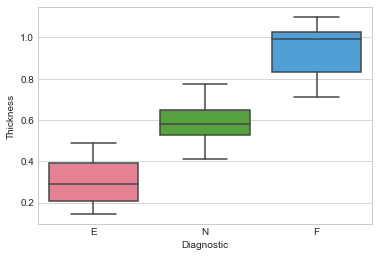

In [25]:
sns.set_palette("husl",3)
sns.set_style("whitegrid")

sns.boxplot(data = df, x="Diagnostic", y="Thickness",
               order=[ "E", "N", "F"])

Làm mô hình hồi quy với design matrix

In [38]:
y,X = pa.dmatrices('Thickness ~ Diagnostic*BMI', data=df, return_type='dataframe')

X.head()

,Intercept,Diagnostic[T.F],Diagnostic[T.N],BMI,Diagnostic[T.F]:BMI,Diagnostic[T.N]:BMI
0,1.0,0.0,0.0,19.467401,0.0,0.0
1,1.0,0.0,0.0,31.833910,0.0,0.0
2,1.0,0.0,0.0,19.944502,0.0,0.0
3,1.0,0.0,0.0,23.437500,0.0,0.0
4,1.0,0.0,0.0,24.337480,0.0,0.0


Mô hình OLS

In [55]:
mod = sm.OLS(y, X)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Thickness   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     41.86
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           4.04e-13
Time:                        20:55:14   Log-Likelihood:                 35.750
No. Observations:                  38   AIC:                            -59.50
Df Residuals:                      32   BIC:                            -49.67
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.3400    

Mô hình GLM

In [56]:
mod2 = sm.GLM(y, X)

res2 = mod2.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Thickness   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     41.86
Date:                Wed, 08 Aug 2018   Prob (F-statistic):           4.04e-13
Time:                        20:56:34   Log-Likelihood:                 35.750
No. Observations:                  38   AIC:                            -59.50
Df Residuals:                      32   BIC:                            -49.67
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.3400    

Đồ thị cho mô hình OLS và GLM

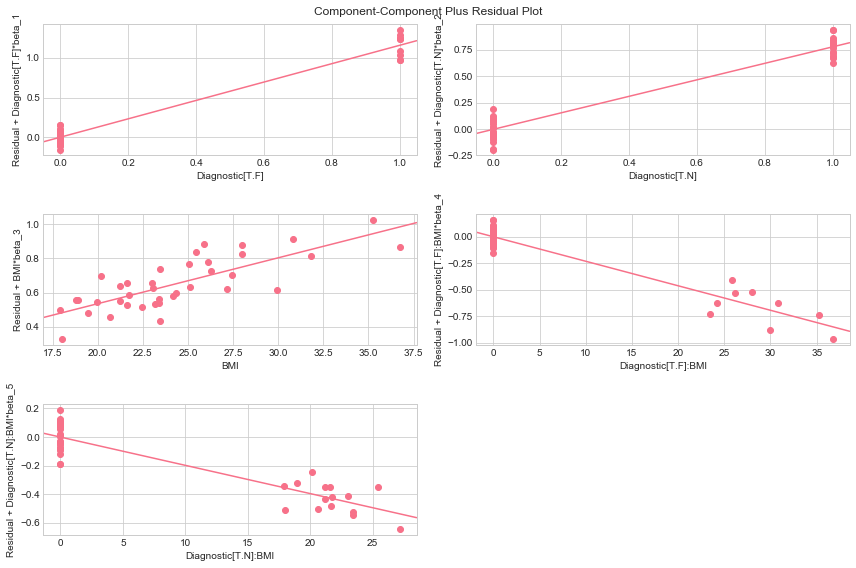

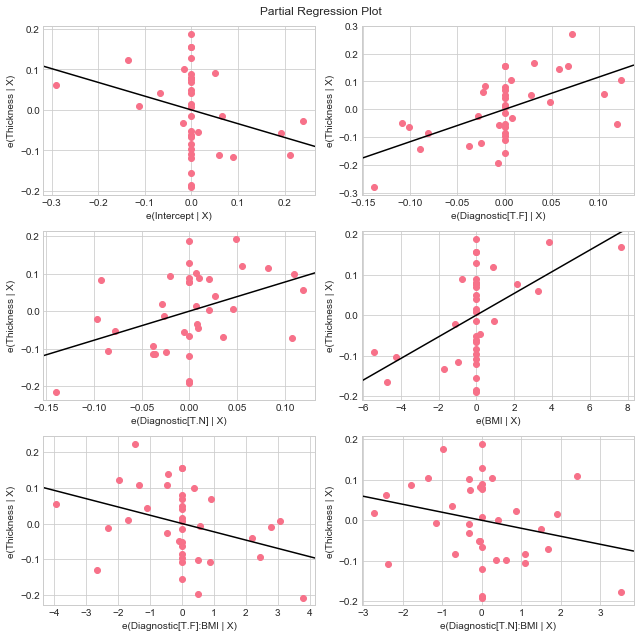

In [98]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(res, fig=fig)

fig=plt.figure(figsize=(9,9))
fig=sm.graphics.plot_partregress_grid(res2,fig=fig)

Đồ thị Leverage vs Std.residual^2

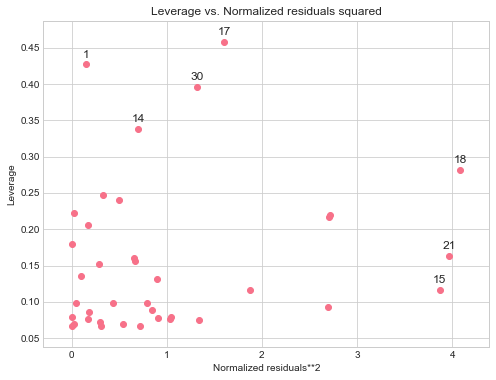

In [81]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.plot_leverage_resid2(res, ax=ax)

Đồ thị Influence points (tiêu chí Cooks distance) và một số đồ thị kiểm tra khác

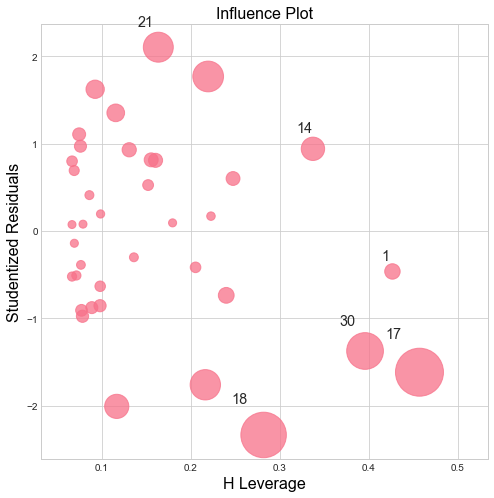

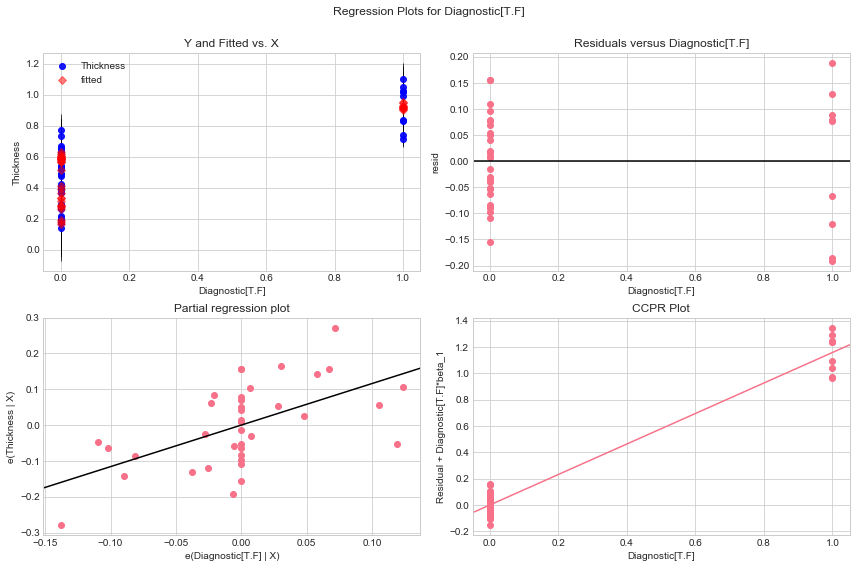

In [97]:
fig, ax = plt.subplots(figsize=(8,8))
fig = sm.graphics.influence_plot(res, ax=ax, criterion="cooks")

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res, "Diagnostic[T.F]", fig=fig)

ANOVA đơn biến và posthoc test

In [192]:
from statsmodels.formula.api import ols

lmod = ols('Thickness ~ Diagnostic',data=df).fit()

table = sm.stats.anova_lm(lmod, typ=2)

print(table)


from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

mod = MultiComparison(df['Thickness'], df['Diagnostic'])

print(mod.tukeyhsd())

posthoc= mod.allpairtest(stats.ttest_ind, method='bonf')[0]

print(posthoc)

             sum_sq    df          F        PR(>F)
Diagnostic  2.09164   2.0  78.851663  1.085499e-13
Residual    0.46421  35.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  E      F     0.6155   0.4951  0.7359  True 
  E      N     0.2835   0.1788  0.3882  True 
  F      N     -0.332  -0.4508 -0.2132  True 
---------------------------------------------
Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval pval_corr reject
--------------------------------------------
  E      F    -11.3782 0.0     0.0     True 
  E      N    -7.2376  0.0     0.0     True 
  F      N     6.8358  0.0     0.0     True 
--------------------------------------------


Kết luận: Python hoàn toàn có thể thay thế base R 